# ML ENDSEM PROJECT: LIVER PATIENT CLASSFIER

### 1.Loading the data



In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/Liver Patient Dataset (LPD)_train.csv', encoding='ISO-8859-1')
print(df['Result'].unique())
print(len(df[df['Result'] == 1]))
print("Data Shape: ", df.shape, "\n")
print("Features:")
j=1
for i in df.columns:
    print(j,i)
    j+=1
    if(j==11):
        break

[1 2]
21917
Data Shape:  (30691, 11) 

Features:
1 Age of the patient
2 Gender of the patient
3 Total Bilirubin
4 Direct Bilirubin
5  Alkphos Alkaline Phosphotase
6  Sgpt Alamine Aminotransferase
7 Sgot Aspartate Aminotransferase
8 Total Protiens
9  ALB Albumin
10 A/G Ratio Albumin and Globulin Ratio


**2.Performing Exploratory data analysis**

In [ ]:
print(len(df[df['Result'] == 1]))

21917


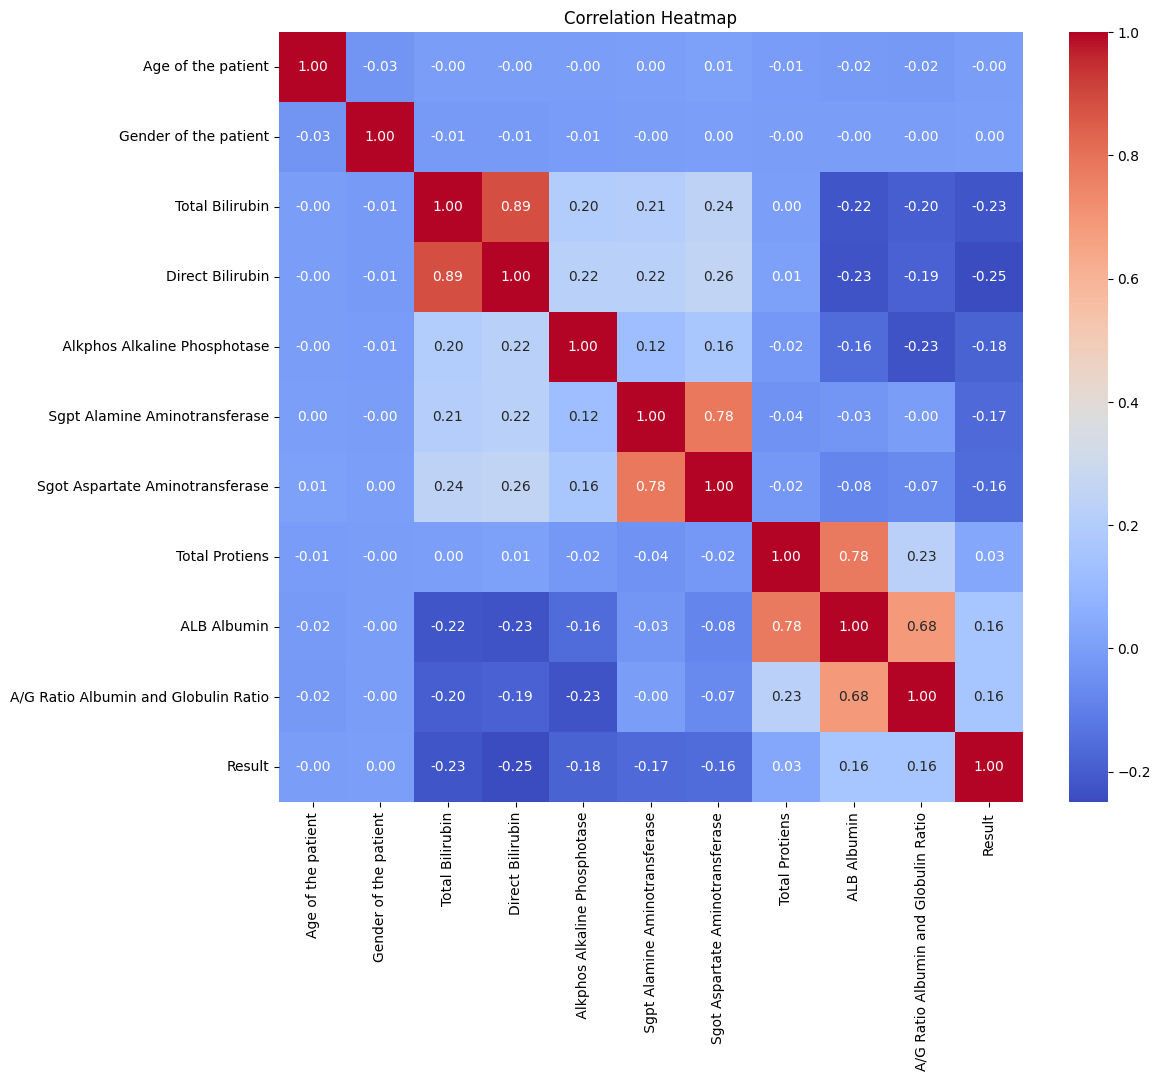

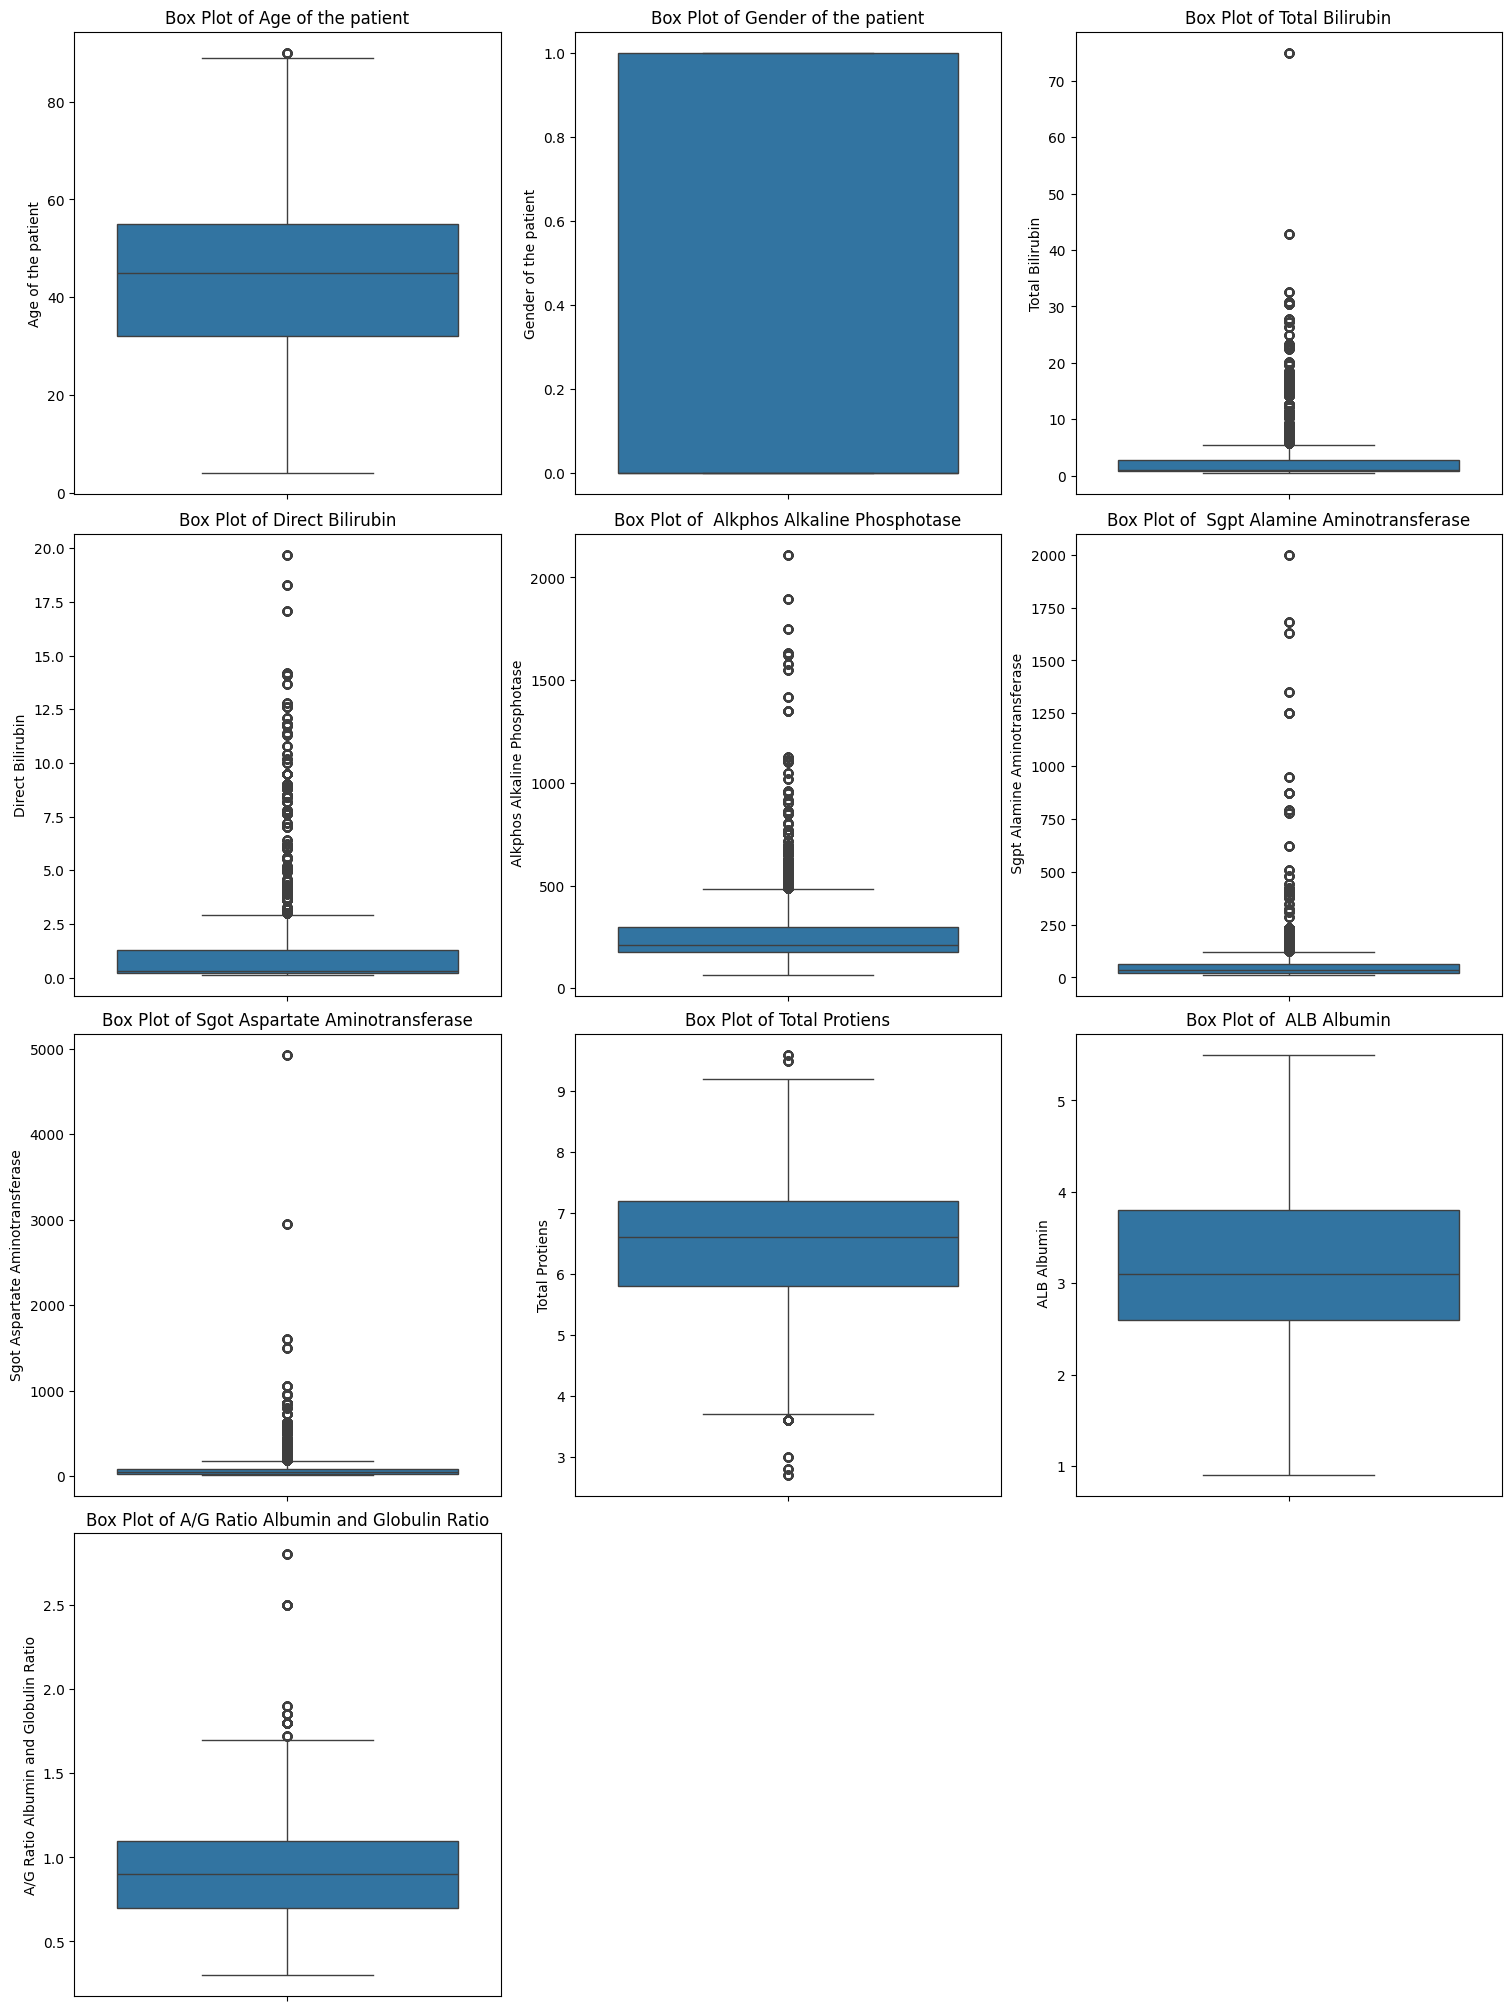

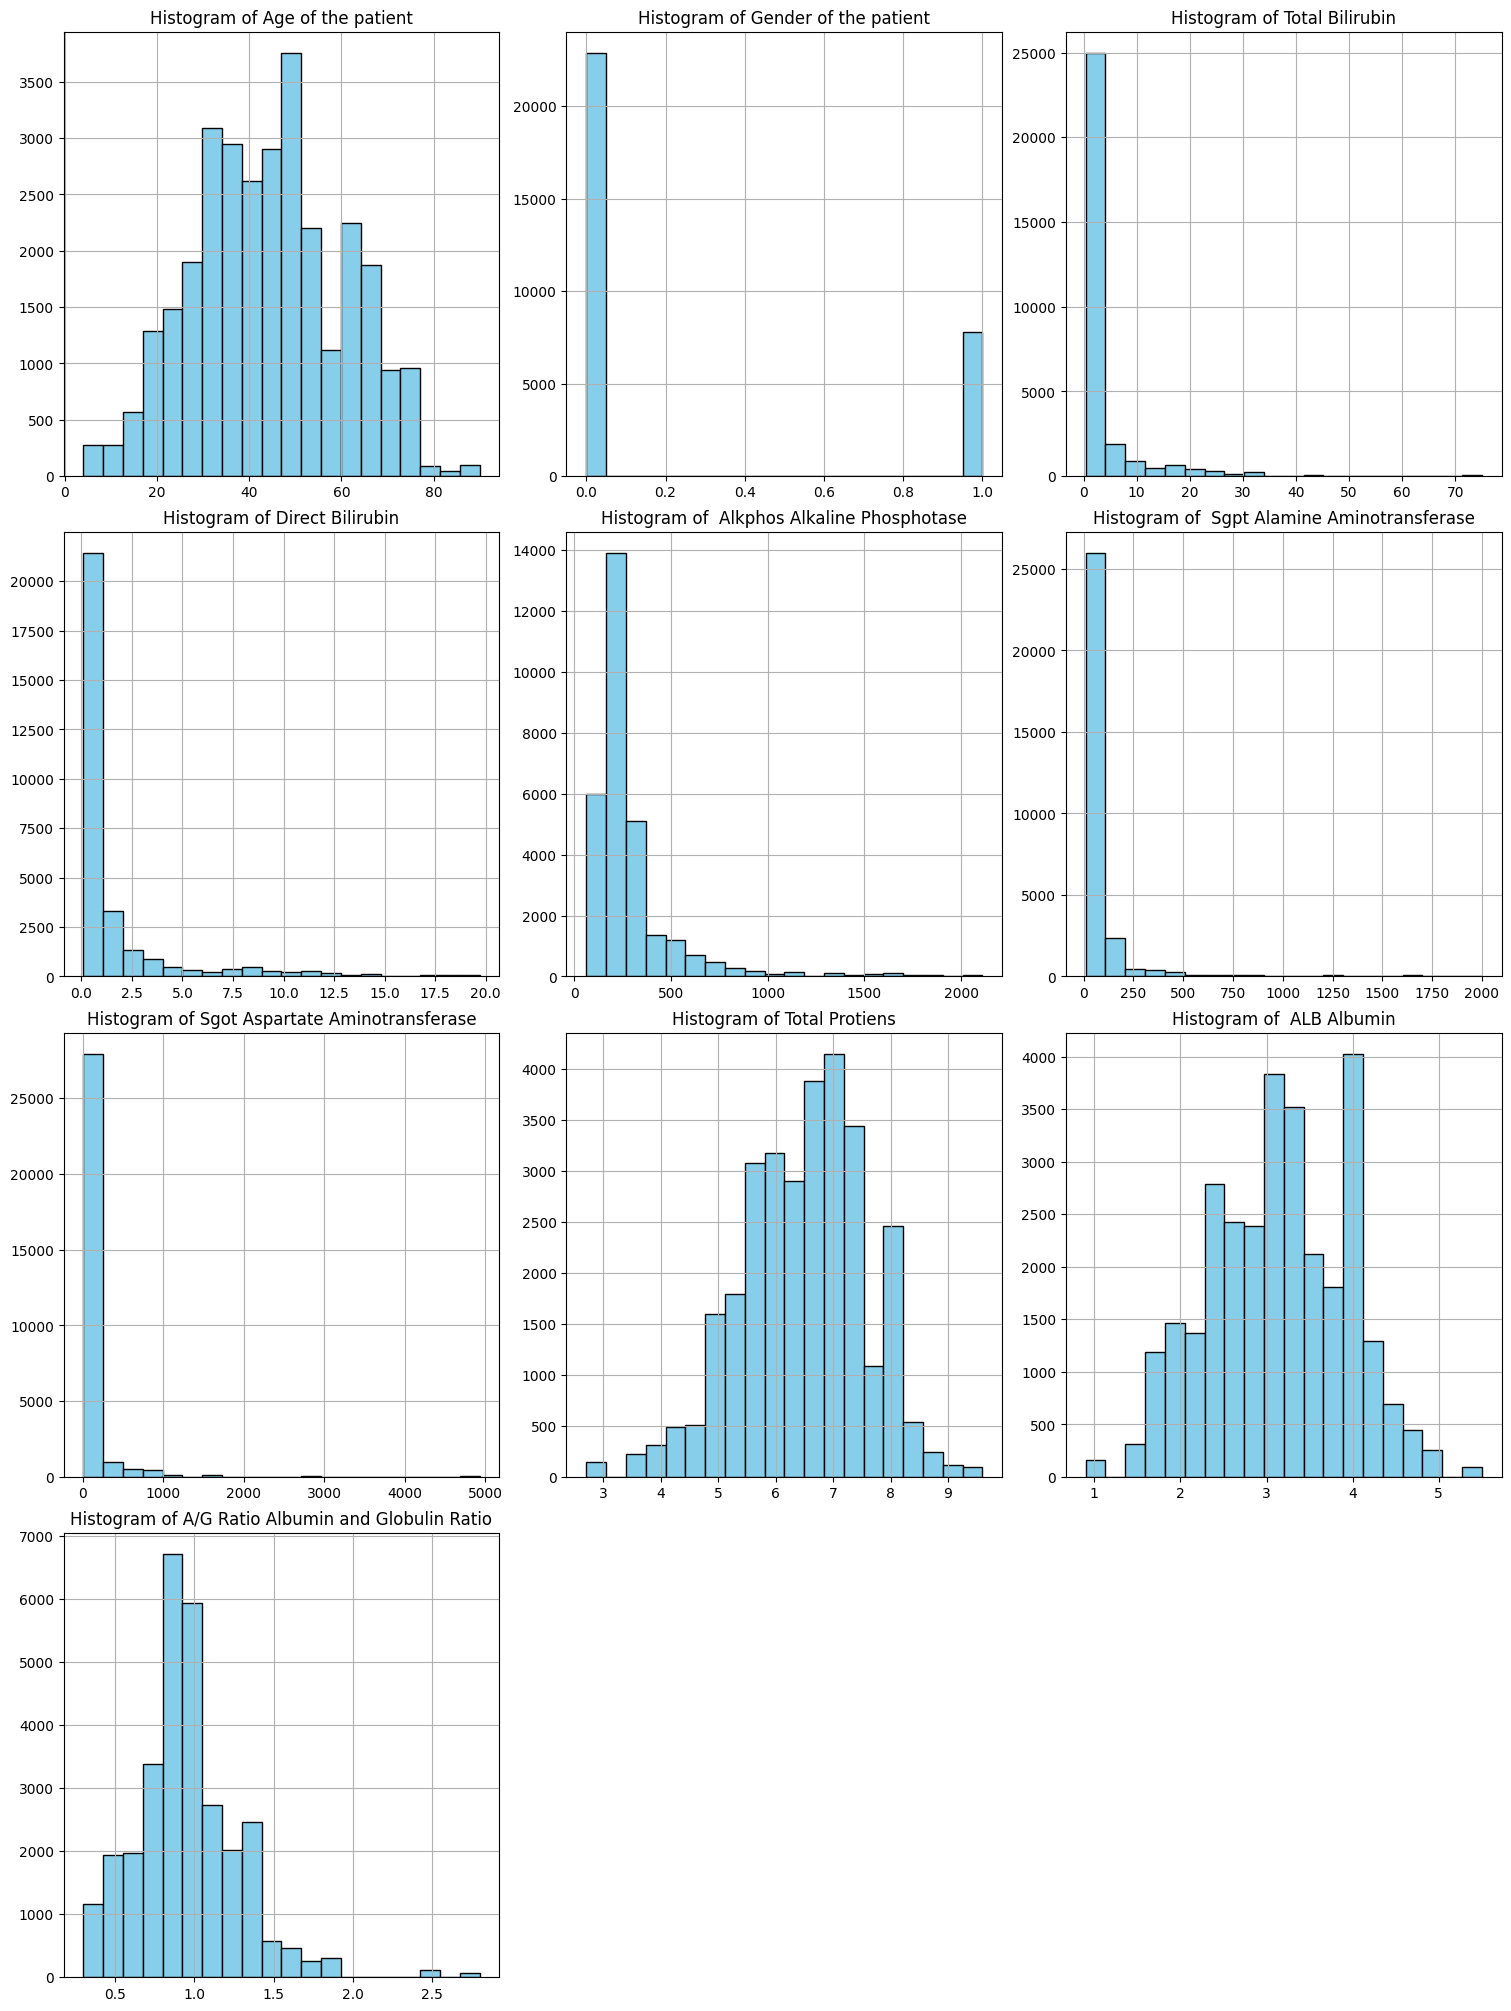

In [ ]:
if 'Gender of the patient' in df.columns:

    df['Gender of the patient'] = df['Gender of the patient'].fillna(df['Gender of the patient'].mode()[0])

    df['Gender of the patient'] = df['Gender of the patient'].map({'Male': 0, 'Female': 1})


plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

##bss ye wali line ko change kia tha
num_features = df.drop(columns=['Result']).select_dtypes(include=['float64', 'int64']).columns  # Select numerical columns
n_cols = 3  # Number of plots per row
n_rows = (len(num_features) + n_cols - 1) // n_cols  # Calculate required rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()

for i, feature in enumerate(num_features):
    sns.boxplot(data=df, y=feature, ax=axes[i])
    axes[i].set_title(f"Box Plot of {feature}")

for j in range(len(num_features), len(axes)):
    axes[j].set_visible(False)

plt.show()

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()

for i, feature in enumerate(num_features):
    df[feature].hist(ax=axes[i], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Histogram of {feature}")

for j in range(len(num_features), len(axes)):
    axes[j].set_visible(False)

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'Result' is your target variable
X = df.drop('Result', axis=1)
y = df['Result']

# Split data into training and temporary sets (80% train, 20% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42) #random_state for reproducibility


# Split temporary set into validation and test sets (50% validation, 50% test, which is 10% and 10% of the total dataset respectively )
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


print("Training data shape:", X_train.shape, y_train.shape)
print("Validation data shape:", X_val.shape, y_val.shape)
print("Test data shape:", X_test.shape, y_test.shape)


Training data shape: (22506, 10) (22506,)
Validation data shape: (2813, 10) (2813,)
Test data shape: (2814, 10) (2814,)


**3.Data Pre - Processing**

In [ ]:
# Get numerical features from the current dataframe columns
num_features = df.drop(columns=['Result']).select_dtypes(include=['float64', 'int64']).columns

# Fill missing numerical values with mean
for feature in num_features:
    if feature in df.columns:  # Check if the feature exists in the DataFrame
        df[feature] = df[feature].fillna(df[feature].mean())
print("Null values handled.")

Null values handled.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Split the dataset into training and validation sets
X = df.drop(columns=['Result'], errors='ignore')  # Features
y = df['Result']  # Target

X_train_numeric = X_train.select_dtypes(include=[np.number])

# Calculate the Z-score for each value in the numeric columns
z_scores = np.abs((X_train_numeric - X_train_numeric.mean()) / X_train_numeric.std())

# Define a Z-score threshold (e.g., 3 standard deviations away from the mean)
threshold = 3
mask = (z_scores < threshold).all(axis=1)

X_train_no_outliers = X_train[mask]
y_train_no_outliers = y_train[mask]

scaler = StandardScaler()


X_train_numeric_no_outliers = X_train_no_outliers.select_dtypes(include=[np.number])
X_train_numeric_scaled = scaler.fit_transform(X_train_numeric_no_outliers)

X_val_numeric = X_val.select_dtypes(include=[np.number])
X_val_numeric_scaled = scaler.transform(X_val_numeric)

X_train_scaled = X_train_no_outliers.copy()
X_train_scaled[X_train_numeric_no_outliers.columns] = X_train_numeric_scaled

X_val_scaled = X_val.copy()
X_val_scaled[X_val_numeric.columns] = X_val_numeric_scaled

# Print the shapes of the resulting datasets
print("Training set shape (after outlier removal):", X_train_scaled.shape)
print("Validation set shape:", X_val_scaled.shape)


Training set shape (after outlier removal): (20362, 10)
Validation set shape: (2813, 10)


**Downsampling**

In [ ]:
print(df['Result'].unique())


[1 2]


In [ ]:
from sklearn.utils import resample
import pandas as pd

# Map target column (already mapped for you)
target_column='Result'

df[target_column] = df[target_column].map({2: 0, 1: 1})

In [ ]:
print

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import pandas as pd

class_0_train = X_train[y_train == 0]
class_1_train = X_train[y_train == 1]

print("Training Class 0 size:", len(class_0_train))
print("Training Class 1 size:", len(class_1_train))

# Perform resampling to balance the training data
class_0_train_balanced = resample(class_0_train,
                                  replace=True,  # Allow resampling if the class has fewer samples
                                  n_samples=15000,  # Desired number of samples
                                  random_state=42)

class_1_train_balanced = resample(class_1_train,
                                  replace=True,
                                  n_samples=18000,  # Desired number of samples
                                  random_state=42)

X_train_balanced = pd.concat([class_0_train_balanced, class_1_train_balanced])

y_train_balanced = pd.concat([y_train[class_0_train_balanced.index], y_train[class_1_train_balanced.index]])

X_train_balanced = X_train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
y_train_balanced = y_train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("Balanced training class distribution:")
print(y_train_balanced.value_counts())

X_train_balanced = X_train_balanced
y_train_balanced = y_train_balanced


Training Class 0 size: 6949
Training Class 1 size: 15557
Balanced training class distribution:
Result
1    18000
0    15000
Name: count, dtype: int64


In [ ]:
# Styling the DataFrame for a white background and displaying it as a table
df.head().style.set_table_styles(
    [{'selector': 'table', 'props': [('background-color', 'white')]}]
)



,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,1.307370,1.712668,-0.426881,-0.497655,-0.427929,-0.359520,-0.332815,0.295540,0.214394,-0.134508,1.000000
1,1.119644,-0.583884,1.203705,1.384177,1.718519,-0.096009,-0.040841,0.942512,0.088175,-0.629621,1.000000
2,1.119644,-0.583884,0.628204,0.896295,0.842333,-0.117968,-0.154782,0.480389,0.214394,-0.165453,1.000000
3,0.869344,-0.583884,-0.378923,-0.393108,-0.448890,-0.370499,-0.325694,0.295540,0.340614,0.174938,1.000000
4,1.745396,-0.583884,0.084676,0.164471,-0.394390,-0.299132,-0.186828,0.757663,-0.921584,-1.681736,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
import numpy as np

df_train = df.copy()

# Strip whitespace from column names
df_train.columns = df_train.columns.str.strip()

# List of numerical features for feature extraction
num_features = ['Age of the patient', 'Total Bilirubin', 'Direct Bilirubin',
                'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase',
                'Sgot Aspartate Aminotransferase', 'Total Protiens', 'ALB Albumin',
                'A/G Ratio Albumin and Globulin Ratio']

# Handle Missing Values (Imputation)
imputer = SimpleImputer(strategy='mean')
df_train[num_features] = imputer.fit_transform(df_train[num_features])


# 1. Polynomial Features (e.g., combinations of Total Bilirubin and Direct Bilirubin)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
bilirubin_features_train = poly.fit_transform(df_train[['Total Bilirubin', 'Direct Bilirubin']])
bilirubin_features_train_df = pd.DataFrame(
    bilirubin_features_train,
    columns=poly.get_feature_names_out(['Total Bilirubin', 'Direct Bilirubin'])
)
df_train = pd.concat([df_train, bilirubin_features_train_df], axis=1)

# 2. Ratio Features (e.g., Albumin to Total Proteins Ratio)
df_train['Albumin_to_Proteins_Ratio'] = df_train['ALB Albumin'] / df_train['Total Protiens']

# 3. Log Transformation (Handle skewed data, e.g., Alkphos Alkaline Phosphotase)
df_train['Log_Alkaline_Phosphatase'] = np.log1p(df_train['Alkphos Alkaline Phosphotase'])

# 4. Normalize Numerical Features
scaler = StandardScaler()
df_train[num_features] = scaler.fit_transform(df_train[num_features])

# Optional: Drop any redundant columns (e.g., the original Total Bilirubin and Direct Bilirubin)
df_train = df_train.drop(columns=['Total Bilirubin', 'Direct Bilirubin'])

# Print the updated DataFrame after feature extraction
print("Feature extraction completed on training data.")
print(df_train.head())


Feature extraction completed on training data.
   Age of the patient  Gender of the patient  Alkphos Alkaline Phosphotase  \
0            1.307690               1.712668                     -0.497990   
1            1.119736              -0.583884                      3.054363   
2            1.119736              -0.583884                      1.604281   
3            0.869131              -0.583884                     -0.532681   
4            1.746250              -0.583884                     -0.442484   

   Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
0                      -0.582837                        -0.528494   
1                       0.083740                         0.170004   
2                       0.028192                        -0.102581   
3                      -0.610611                        -0.511458   
4                      -0.430080                        -0.179245   

   Total Protiens  ALB Albumin  A/G Ratio Albumin and Globulin Ratio 

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Use Logistic Regression as the base model
model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(model, n_features_to_select=6)  # Adjust the number of features to select
rfe.fit(X_train_balanced, y_train_balanced)

# Get selected features
selected= X_train_balanced.columns[rfe.support_]
print("Selected Features (RFE):", selected.tolist())
# Assuming `df` is your full dataset and `selected_features` is a list of selected feature names
X_selected = df[selected]



Selected Features (RFE): ['Direct Bilirubin', '\xa0Alkphos Alkaline Phosphotase', '\xa0Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', '\xa0ALB Albumin']


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, f1_score
import numpy as np

# Stratified K-Fold for consistent evaluation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

nb = GaussianNB()

# Cross-validation for Naive Bayes
nb_scores = cross_val_score(nb, X_train, y_train, scoring='accuracy', cv=cv)
print("Naive Bayes Cross-Validation Accuracy Scores:", nb_scores)
print("Naive Bayes Mean Validation Accuracy:", np.mean(nb_scores))
print("Naive Bayes Standard Deviation:", np.std(nb_scores))

# Fit Naive Bayes on the training dataset
nb.fit(X_train, y_train)

# Evaluate on the training data
nb_train_preds = nb.predict(X_train)
nb_train_accuracy = accuracy_score(y_train, nb_train_preds)
nb_train_rmse = np.sqrt(mean_squared_error(y_train, nb_train_preds))  # RMSE for training data
nb_train_f1 = f1_score(y_train, nb_train_preds, average='weighted')  # F1 Score for training data

print("\nNaive Bayes Training Accuracy:", nb_train_accuracy)
print("Naive Bayes Training RMSE:", nb_train_rmse)
print("Naive Bayes Training F1 Score:", nb_train_f1)

# Evaluate on the testing data
nb_test_preds = nb.predict(X_test)
nb_test_accuracy = accuracy_score(y_test, nb_test_preds)
nb_test_rmse = np.sqrt(mean_squared_error(y_test, nb_test_preds))  # RMSE for testing data
nb_test_f1 = f1_score(y_test, nb_test_preds, average='weighted')  # F1 Score for testing data

print("Naive Bayes Testing Accuracy:", nb_test_accuracy)
print("Naive Bayes Testing RMSE:", nb_test_rmse)
print("Naive Bayes Testing F1 Score:", nb_test_f1)

print("\nNaive Bayes Classification Report (on testing dataset):")
print(classification_report(y_test, nb_test_preds))

lr = LogisticRegression(max_iter=1000, random_state=42)

# Cross-validation for Logistic Regression
lr_scores = cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=cv)
print("\nLogistic Regression Cross-Validation Accuracy Scores:", lr_scores)
print("Logistic Regression Mean Validation Accuracy:", np.mean(lr_scores))
print("Logistic Regression Standard Deviation:", np.std(lr_scores))

# Fit Logistic Regression on the training dataset
lr.fit(X_train, y_train)

# Evaluate on the training data
lr_train_preds = lr.predict(X_train)
lr_train_accuracy = accuracy_score(y_train, lr_train_preds)
lr_train_rmse = np.sqrt(mean_squared_error(y_train, lr_train_preds))  # RMSE for training data
lr_train_f1 = f1_score(y_train, lr_train_preds, average='weighted')  # F1 Score for training data

print("\nLogistic Regression Training Accuracy:", lr_train_accuracy)
print("Logistic Regression Training RMSE:", lr_train_rmse)
print("Logistic Regression Training F1 Score:", lr_train_f1)

# Evaluate on the testing data
lr_test_preds = lr.predict(X_test)
lr_test_accuracy = accuracy_score(y_test, lr_test_preds)
lr_test_rmse = np.sqrt(mean_squared_error(y_test, lr_test_preds))  # RMSE for testing data
lr_test_f1 = f1_score(y_test, lr_test_preds, average='weighted')  # F1 Score for testing data

print("Logistic Regression Testing Accuracy:", lr_test_accuracy)
print("Logistic Regression Testing RMSE:", lr_test_rmse)
print("Logistic Regression Testing F1 Score:", lr_test_f1)

print("\nLogistic Regression Classification Report (on testing dataset):")
print(classification_report(y_test, lr_test_preds))


Naive Bayes Cross-Validation Accuracy Scores: [0.57107952 0.57187292 0.56920684 0.57431682 0.57387247]
Naive Bayes Mean Validation Accuracy: 0.5720697143070334
Naive Bayes Standard Deviation: 0.001871612210941439

Naive Bayes Training Accuracy: 0.5722474006931485
Naive Bayes Training RMSE: 0.6540279805228914
Naive Bayes Training F1 Score: 0.5751985192326469
Naive Bayes Testing Accuracy: 0.5722409809845388
Naive Bayes Testing RMSE: 0.6540328883286078
Naive Bayes Testing F1 Score: 0.5738777307783697

Naive Bayes Classification Report (on testing dataset):
              precision    recall  f1-score   support

           0       0.42      0.89      0.57      1774
           1       0.89      0.43      0.58      3853

    accuracy                           0.57      5627
   macro avg       0.66      0.66      0.57      5627
weighted avg       0.74      0.57      0.57      5627


Logistic Regression Cross-Validation Accuracy Scores: [0.69924478 0.70028882 0.69940013 0.69873361 0.70317707]
L

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, f1_score
import numpy as np

# Stratified K-Fold setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42, n_estimators=100)

# Cross-validation for Random Forest
rf_scores = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=cv)
print("\nRandom Forest Cross-Validation Accuracy Scores:", rf_scores)
print("Random Forest Mean Validation Accuracy:", np.mean(rf_scores))
print("Random Forest Standard Deviation:", np.std(rf_scores))

# Fit Random Forest on the training dataset
rf.fit(X_train, y_train)

# Evaluate on the training data
rf_train_preds = rf.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_preds)
rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_preds))  # RMSE for training data
rf_train_f1 = f1_score(y_train, rf_train_preds, average='weighted')  # F1 Score for training data

print("\nRandom Forest Training Accuracy:", rf_train_accuracy)
print("Random Forest Training RMSE:", rf_train_rmse)
print("Random Forest Training F1 Score:", rf_train_f1)

# Evaluate on the testing data
rf_test_preds = rf.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_test_preds)
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_preds))  # RMSE for testing data
rf_test_f1 = f1_score(y_test, rf_test_preds, average='weighted')  # F1 Score for testing data

print("Random Forest Testing Accuracy:", rf_test_accuracy)
print("Random Forest Testing RMSE:", rf_test_rmse)
print("Random Forest Testing F1 Score:", rf_test_f1)

print("\nRandom Forest Classification Report (on testing dataset):")
print(classification_report(y_test, rf_test_preds))

dt = DecisionTreeClassifier(random_state=42)

# Cross-validation for Decision Tree
dt_scores = cross_val_score(dt, X_train, y_train, scoring='accuracy', cv=cv)
print("\nDecision Tree Cross-Validation Accuracy Scores:", dt_scores)
print("Decision Tree Mean Validation Accuracy:", np.mean(dt_scores))
print("Decision Tree Standard Deviation:", np.std(dt_scores))

# Fit Decision Tree on the training dataset
dt.fit(X_train, y_train)

# Evaluate on the training data
dt_train_preds = dt.predict(X_train)
dt_train_accuracy = accuracy_score(y_train, dt_train_preds)
dt_train_rmse = np.sqrt(mean_squared_error(y_train, dt_train_preds))  # RMSE for training data
dt_train_f1 = f1_score(y_train, dt_train_preds, average='weighted')  # F1 Score for training data

print("\nDecision Tree Training Accuracy:", dt_train_accuracy)
print("Decision Tree Training RMSE:", dt_train_rmse)
print("Decision Tree Training F1 Score:", dt_train_f1)

# Evaluate on the testing data
dt_test_preds = dt.predict(X_test)
dt_test_accuracy = accuracy_score(y_test, dt_test_preds)
dt_test_rmse = np.sqrt(mean_squared_error(y_test, dt_test_preds))  # RMSE for testing data
dt_test_f1 = f1_score(y_test, dt_test_preds, average='weighted')  # F1 Score for testing data

print("Decision Tree Testing Accuracy:", dt_test_accuracy)
print("Decision Tree Testing RMSE:", dt_test_rmse)
print("Decision Tree Testing F1 Score:", dt_test_f1)

print("\nDecision Tree Classification Report (on testing dataset):")
print(classification_report(y_test, dt_test_preds))

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Cross-validation for XGBoost
xgb_scores = cross_val_score(xgb, X_train, y_train, scoring='accuracy', cv=cv)
print("\nXGBoost Cross-Validation Accuracy Scores:", xgb_scores)
print("XGBoost Mean Validation Accuracy:", np.mean(xgb_scores))
print("XGBoost Standard Deviation:", np.std(xgb_scores))

# Fit XGBoost on the training dataset
xgb.fit(X_train, y_train)

# Evaluate on the training data
xgb_train_preds = xgb.predict(X_train)
xgb_train_accuracy = accuracy_score(y_train, xgb_train_preds)
xgb_train_rmse = np.sqrt(mean_squared_error(y_train, xgb_train_preds))  # RMSE for training data
xgb_train_f1 = f1_score(y_train, xgb_train_preds, average='weighted')  # F1 Score for training data

print("\nXGBoost Training Accuracy:", xgb_train_accuracy)
print("XGBoost Training RMSE:", xgb_train_rmse)
print("XGBoost Training F1 Score:", xgb_train_f1)

# Evaluate on the testing data
xgb_test_preds = xgb.predict(X_test)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_preds)
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_preds))  # RMSE for testing data
xgb_test_f1 = f1_score(y_test, xgb_test_preds, average='weighted')  # F1 Score for testing data

print("XGBoost Testing Accuracy:", xgb_test_accuracy)
print("XGBoost Testing RMSE:", xgb_test_rmse)
print("XGBoost Testing F1 Score:", xgb_test_f1)

print("\nXGBoost Classification Report (on testing dataset):")
print(classification_report(y_test, xgb_test_preds))



Random Forest Cross-Validation Accuracy Scores: [0.99511328 0.9951122  0.99289047 0.99489002 0.99222395]
Random Forest Mean Validation Accuracy: 0.9940459847463682
Random Forest Standard Deviation: 0.0012363951330623373

Random Forest Training Accuracy: 0.9999111348084955
Random Forest Training RMSE: 0.009426833588458411
Random Forest Training F1 Score: 0.9999111312694082
Random Forest Testing Accuracy: 0.9968011373733784
Random Forest Testing RMSE: 0.056558488546120514
Random Forest Testing F1 Score: 0.9967986895279951

Random Forest Classification Report (on testing dataset):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1774
           1       1.00      1.00      1.00      3853

    accuracy                           1.00      5627
   macro avg       1.00      1.00      1.00      5627
weighted avg       1.00      1.00      1.00      5627


Decision Tree Cross-Validation Accuracy Scores: [0.98733896 0.98978005 0.98822484 0.99

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:52:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:52:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:52:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:52:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:52:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


XGBoost Cross-Validation Accuracy Scores: [0.9962239  0.99711175 0.99555654 0.99822262 0.99377916]
XGBoost Mean Validation Accuracy: 0.9961787947611425
XGBoost Standard Deviation: 0.0014963354570774411


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:52:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Training Accuracy: 0.999466808850973
XGBoost Training RMSE: 0.02309093218185282
XGBoost Training F1 Score: 0.9994667663686778
XGBoost Testing Accuracy: 0.9978674249155856
XGBoost Testing RMSE: 0.046179812520347356
XGBoost Testing F1 Score: 0.9978667746279435

XGBoost Classification Report (on testing dataset):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1774
           1       1.00      1.00      1.00      3853

    accuracy                           1.00      5627
   macro avg       1.00      1.00      1.00      5627
weighted avg       1.00      1.00      1.00      5627



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, f1_score
import numpy as np

# Stratified K-Fold setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

svm = SVC(kernel='rbf', random_state=42)

# Cross-validation for SVM
svm_scores = cross_val_score(svm, X_train, y_train, scoring='accuracy', cv=cv)
print("\nSVM Cross-Validation Accuracy Scores:", svm_scores)
print("SVM Mean Validation Accuracy:", np.mean(svm_scores))
print("SVM Standard Deviation:", np.std(svm_scores))

# Fit SVM on the training dataset
svm.fit(X_train, y_train)

# Evaluate on the training data
svm_train_preds = svm.predict(X_train)
svm_train_accuracy = accuracy_score(y_train, svm_train_preds)
svm_train_rmse = np.sqrt(mean_squared_error(y_train, svm_train_preds))  # RMSE for training data
svm_train_f1 = f1_score(y_train, svm_train_preds, average='weighted')  # F1 Score for training data

print("\nSVM Training Accuracy:", svm_train_accuracy)
print("SVM Training RMSE:", svm_train_rmse)
print("SVM Training F1 Score:", svm_train_f1)

# Evaluate on the testing data
svm_test_preds = svm.predict(X_test)
svm_test_accuracy = accuracy_score(y_test, svm_test_preds)
svm_test_rmse = np.sqrt(mean_squared_error(y_test, svm_test_preds))  # RMSE for testing data
svm_test_f1 = f1_score(y_test, svm_test_preds, average='weighted')  # F1 Score for testing data

print("SVM Testing Accuracy:", svm_test_accuracy)
print("SVM Testing RMSE:", svm_test_rmse)
print("SVM Testing F1 Score:", svm_test_f1)

print("\nSVM Classification Report (on testing dataset):")
print(classification_report(y_test, svm_test_preds))



SVM Cross-Validation Accuracy Scores: [0.74589072 0.74427905 0.73228172 0.73472562 0.74116863]
SVM Mean Validation Accuracy: 0.73966914504709
SVM Standard Deviation: 0.005314512170407823

SVM Training Accuracy: 0.7446014396161024
SVM Training RMSE: 0.50536972642205
SVM Training F1 Score: 0.7084874872958037
SVM Testing Accuracy: 0.7357384041229785
SVM Testing RMSE: 0.5140638052586678
SVM Testing F1 Score: 0.6995852755870517

SVM Classification Report (on testing dataset):
              precision    recall  f1-score   support

           0       0.68      0.30      0.42      1774
           1       0.74      0.94      0.83      3853

    accuracy                           0.74      5627
   macro avg       0.71      0.62      0.62      5627
weighted avg       0.73      0.74      0.70      5627



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, f1_score
import numpy as np

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],  # Different sizes for the hidden layer
    'activation': ['relu', 'tanh'],  # Common activation functions
    'max_iter': [100, 200],  # Keep iterations small to save time
    'learning_rate': ['constant', 'adaptive'],  # Different learning rates
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=3, verbose=1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters from grid search
print("\nBest Parameters from Grid Search:", grid_search.best_params_)


best_mlp = grid_search.best_estimator_

# Evaluate on the training data
mlp_train_preds = best_mlp.predict(X_train)
mlp_train_accuracy = accuracy_score(y_train, mlp_train_preds)
mlp_train_rmse = np.sqrt(mean_squared_error(y_train, mlp_train_preds))  # RMSE for training data
mlp_train_f1 = f1_score(y_train, mlp_train_preds, average='weighted')  # F1 Score for training data

print("\nMLP Training Accuracy:", mlp_train_accuracy)
print("MLP Training RMSE:", mlp_train_rmse)
print("MLP Training F1 Score:", mlp_train_f1)

# Evaluate on the validation data
mlp_val_preds = best_mlp.predict(X_val)
mlp_val_accuracy = accuracy_score(y_val, mlp_val_preds)
mlp_val_rmse = np.sqrt(mean_squared_error(y_val, mlp_val_preds))  # RMSE for validation data
mlp_val_f1 = f1_score(y_val, mlp_val_preds, average='weighted')  # F1 Score for validation data

print("MLP Validation Accuracy:", mlp_val_accuracy)
print("MLP Validation RMSE:", mlp_val_rmse)
print("MLP Validation F1 Score:", mlp_val_f1)

# Classification report for the validation set
print("\nMLP Classification Report (on validation dataset):")
print(classification_report(y_val, mlp_val_preds))


Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro


Best Parameters from Grid Search: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 200}

MLP Training Accuracy: 0.8601261885719363
MLP Training RMSE: 0.37399707409024424
MLP Training F1 Score: 0.8606658810920839
MLP Validation Accuracy: 0.8551626088501866
MLP Validation RMSE: 0.3805750795175814
MLP Validation F1 Score: 0.8556234090854516

MLP Classification Report (on validation dataset):
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1774
           1       0.90      0.89      0.89      3853

    accuracy                           0.86      5627
   macro avg       0.83      0.84      0.83      5627
weighted avg       0.86      0.86      0.86      5627



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Evaluate the best MLP model on the test data
mlp_test_preds = best_mlp.predict(X_test)
mlp_test_accuracy = accuracy_score(y_test, mlp_test_preds)

print("MLP Test Accuracy:", mlp_test_accuracy)

MLP Test Accuracy: 0.8551626088501866


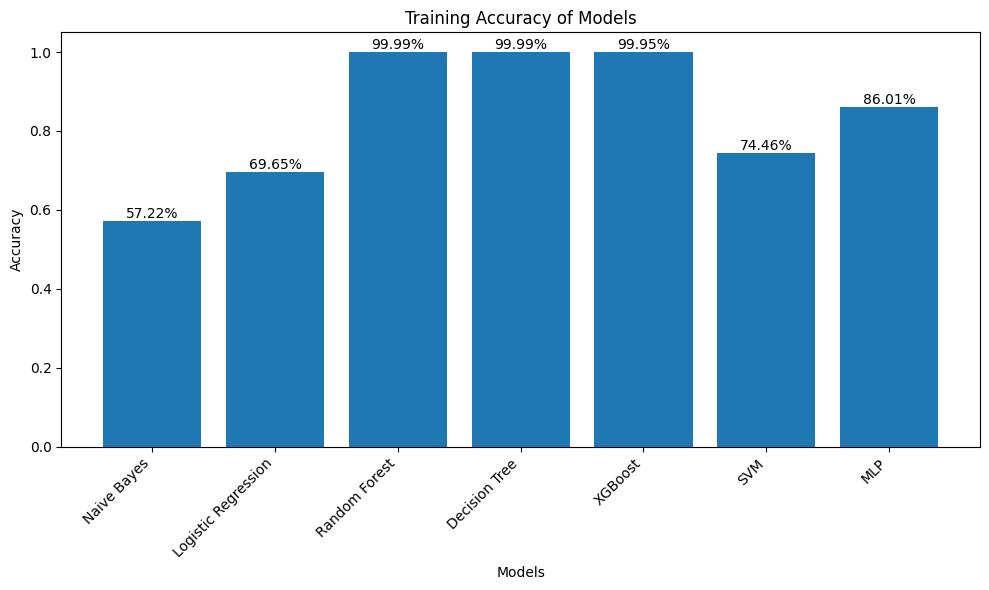

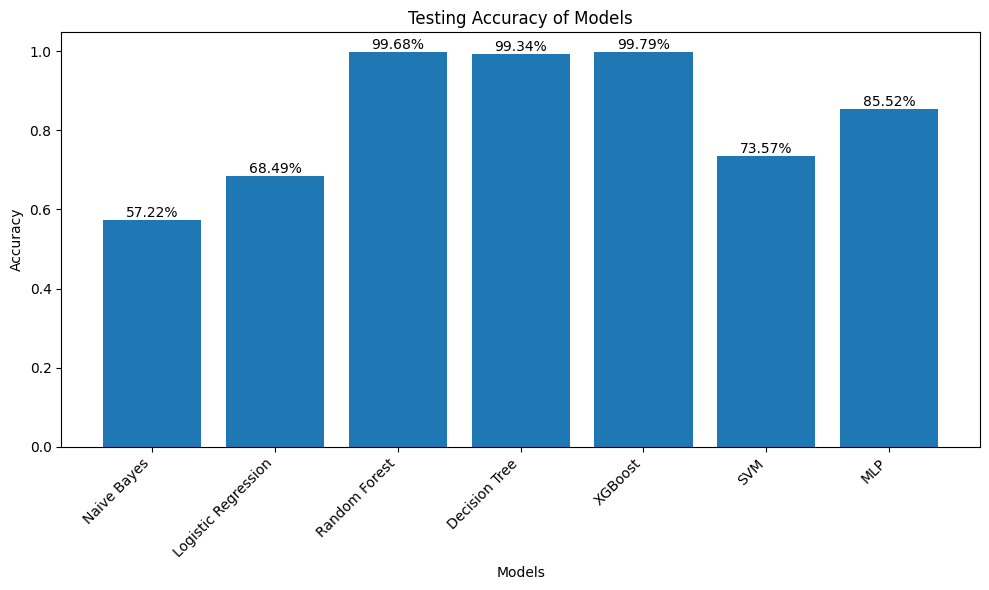

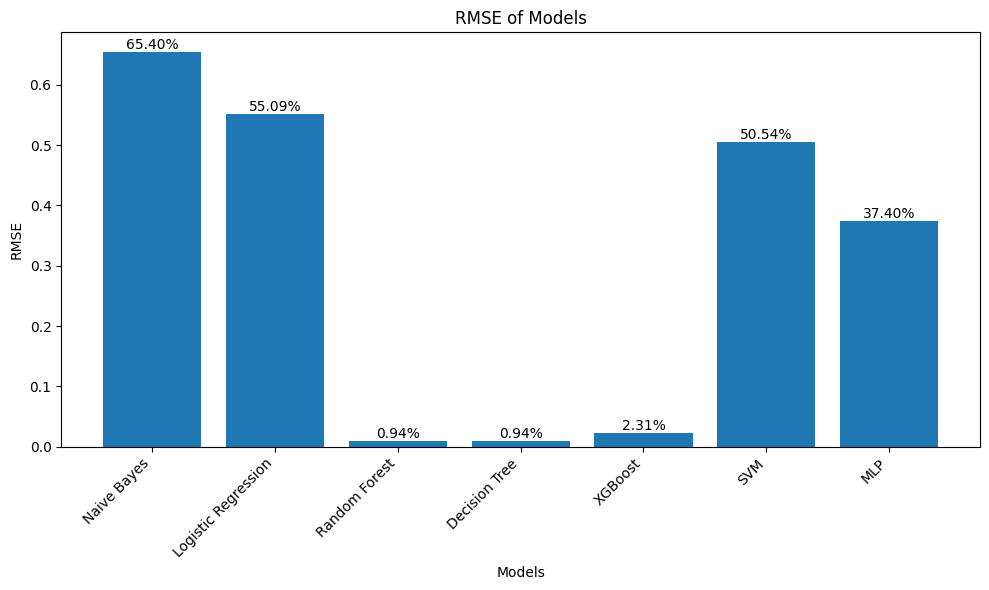

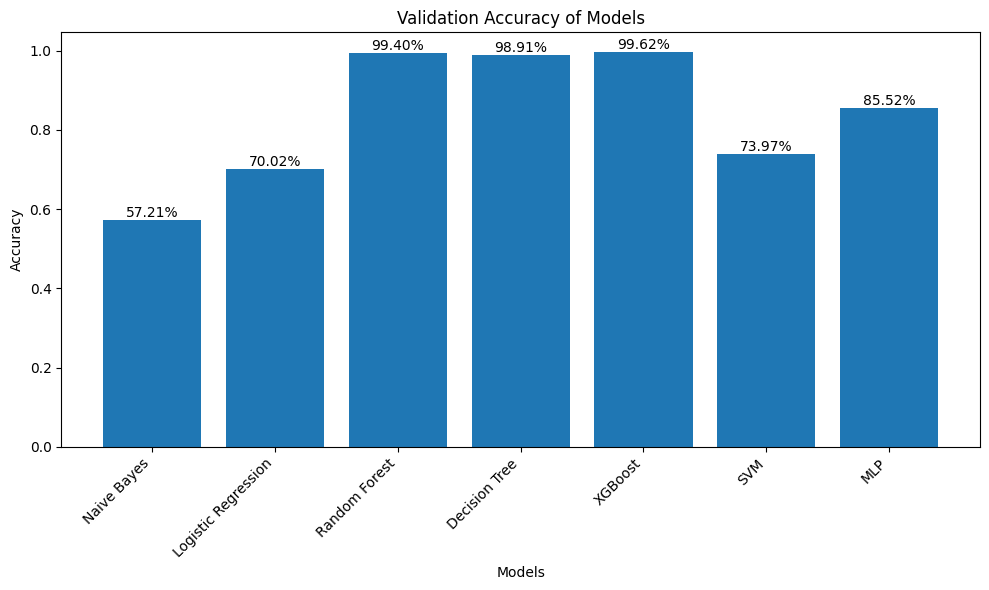

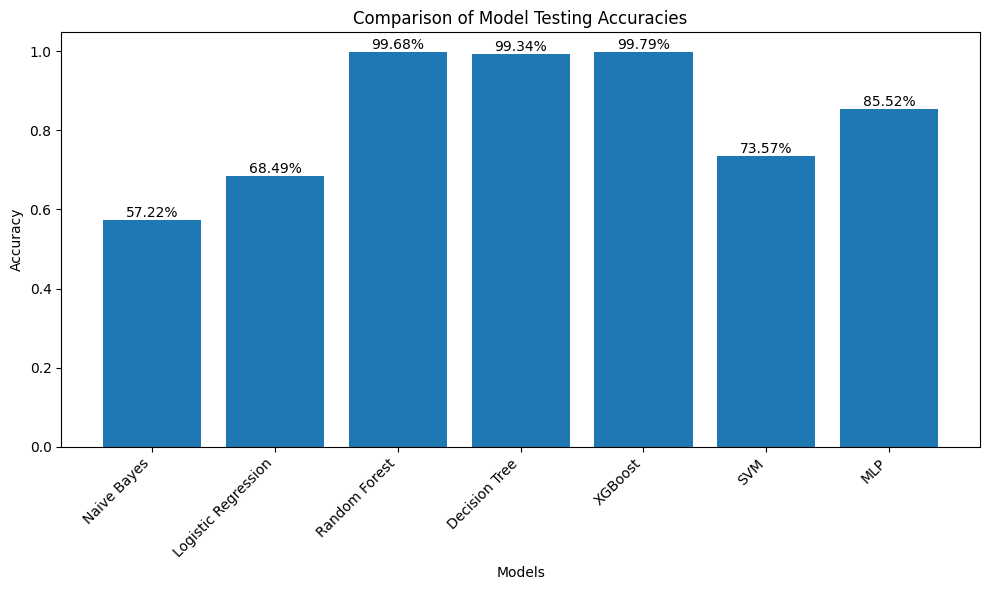

In [ ]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual model evaluation results)
models = ['Naive Bayes', 'Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost', 'SVM', 'MLP']
training_accuracy = [nb_train_accuracy, lr_train_accuracy, rf_train_accuracy, dt_train_accuracy, xgb_train_accuracy, svm_train_accuracy, mlp_train_accuracy]
testing_accuracy = [nb_test_accuracy, lr_test_accuracy, rf_test_accuracy, dt_test_accuracy, xgb_test_accuracy, svm_test_accuracy, mlp_test_accuracy]
rmse = [nb_train_rmse, lr_train_rmse, rf_train_rmse, dt_train_rmse, xgb_train_rmse, svm_train_rmse, mlp_train_rmse] # Example RMSE values
validation_accuracy = [np.mean(nb_scores), np.mean(lr_scores), np.mean(rf_scores), np.mean(dt_scores), np.mean(xgb_scores), np.mean(svm_scores), mlp_val_accuracy]


def plot_bar_graph(x_values, y_values, title, ylabel):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(x_values, y_values)
    plt.title(title)
    plt.xlabel("Models")
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

    # Add accuracy percentage on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


# Plot Training Accuracy
plot_bar_graph(models, training_accuracy, "Training Accuracy of Models", "Accuracy")

# Plot Testing Accuracy
plot_bar_graph(models, testing_accuracy, "Testing Accuracy of Models", "Accuracy")


# Plot RMSE
plot_bar_graph(models, rmse, "RMSE of Models", "RMSE")

# Plot Validation Accuracy
plot_bar_graph(models, validation_accuracy, "Validation Accuracy of Models", "Accuracy")


# Plot Model Comparison (using testing accuracy as an example)
plot_bar_graph(models, testing_accuracy, "Comparison of Model Testing Accuracies", "Accuracy")